In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


c:\users\twink\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
def readData(filename):
    data=pd.read_csv(filename)
    return data.values


In [24]:
x=np.asarray(readData('./data/linearX.csv'))
y=np.asarray(readData('./data/linearY.csv'))

In [27]:
x=x.reshape((x.shape[0],))
y=y.reshape((y.shape[0],))# converting to a linear array

In [28]:
print( x, y , sep="\n")

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99387 1.0004  0.99

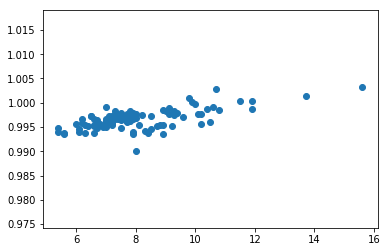

In [29]:
plt.scatter(x,y)
plt.show()

# we need to normalise the x values 

In [31]:
x=x-np.mean(x)
x=x/np.std(x)

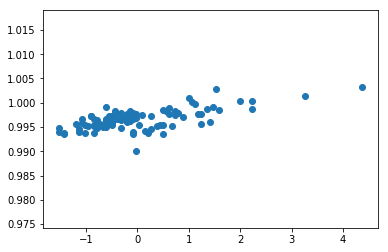

In [33]:
plt.scatter(x,y)

In [87]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [88]:
def error( x,y,theta):
    error=0
    m=x.shape[0]
    for i in range(m):
        error+=(y[i]-(hypothesis(x,theta)))**2
    return 0.5*m*error

In [89]:
def gradient( x, y, theta):
    grad=np.array((0.0,0.0))
    m=x.shape[0]
    for i in range (m):
        grad[0]+=y[i]-hypothesis(x[i],theta)
        grad[1]+=(y[i]-hypothesis(x[i],theta))*x[i];
    return grad

def gradientDescent( x,y,learningRate,maxItr):
    grad=np.asarray((0.0,0.0))
    theta=np.asarray((0.0,0.0))
    totalError=[]
    for i in range(maxItr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        totalError.append(e)
        theta[0]=theta[0]+grad[0]*learningRate
        theta[1]=theta[1]+grad[1]*learningRate
    return (theta,totalError)
        

In [90]:
ans=gradientDescent(x,y,0.001,50)
theta=ans[0]
errora=ans[1]

In [81]:
theta

array([0.99663414, 0.00135794])

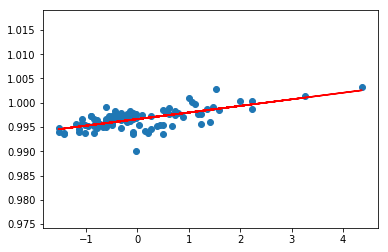

In [62]:
plt.scatter(x,y)
plt.plot(x, hypothesis(x,theta),color='red')
plt.show()

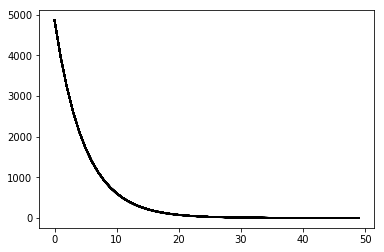

In [93]:
plt.plot(errora,color='black')
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=x.reshape((x.shape[0],1))
Y=y.reshape((y.shape[0],1))
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
y_predict=model.predict(X)
model.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

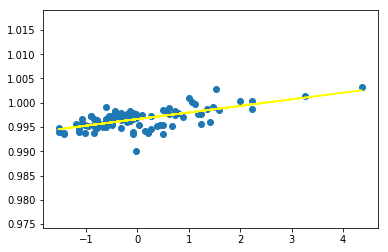

In [106]:
plt.scatter( X,Y)
plt.plot(X,y_predict,color='yellow')
plt.show()

In [113]:
print(model.intercept_,model.coef_)

[0.99663414] [[0.00135794]]
